The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

*Average Fare ($) Per City

*Total Number of Rides Per City

*Total Number of Drivers Per City

*City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

1. % of Total Fares by City Type

2. % of Total Rides by City Type

3. % of Total Drivers by City Type

As final considerations:

You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib and Seaborn libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
Remember when making your plots to consider aesthetics!
You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.
You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.
See Example Solution for a reference on expected format.

In [146]:
#Importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [147]:
# Reading csv files
csvpath1 = os.path.join('raw_data', 'city_data.csv')
csvpath2 = os.path.join('raw_data', 'ride_data.csv')
city_df = pd.read_csv(csvpath1)
ride_df = pd.read_csv(csvpath2)


city_df.head()
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [148]:

#Calculate
# *Average Fare ($) Per City

# *Total Number of Rides Per City

# *Total Number of Drivers Per City

# *City Type (Urban, Suburban, Rural)


ride_groupby= ride_df.groupby("city")
ride_groupby.count()

average_fare_city= ride_groupby["fare"].mean()
total_fare_city= ride_groupby["fare"].sum()
rides_per_city= ride_groupby["ride_id"].count()


summary_table1 = pd.DataFrame({"city":average_fare_city.keys(),
                               "average_fare": average_fare_city.values,
                               "total_fare" : total_fare_city.values,
                               "total_rides": rides_per_city.values})

city_data = pd.merge(city_df ,summary_table1, how="left", on='city')
city_data.dropna(how="any")
city_data.head()


# Format for percentages
#merged_df["% Recommend"] = merged_df["% Recommend"].map("{0:,.2f}%".format)


,city,driver_count,type,average_fare,total_fare,total_rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


In [149]:
urban_data = city_data.loc[city_data["type"] == "Urban",:]
suburban_data = city_data.loc[city_data["type"] == "Suburban",:]
rural_data = city_data.loc[city_data["type"] == "Rural",:]
max_total_rides = city_data["total_rides"].max()

urban_data.head()
suburban_data.head()
rural_data.head()


,city,driver_count,type,average_fare,total_fare,total_rides
108,South Elizabethmouth,3,Rural,28.698000,143.49,5
109,East Troybury,3,Rural,33.244286,232.71,7
110,Kinghaven,3,Rural,34.980000,209.88,6
111,New Johnbury,6,Rural,35.042500,140.17,4
112,Erikport,3,Rural,30.043750,240.35,8


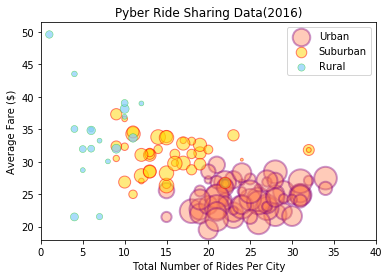

In [150]:
# building bubble plots
# Change color with c and alpha. I map the color to the X axis value. 


# The colors of each section of the pie chart
labels = ('Urban', 'Suburban', 'Rural')
colors = ["coral","gold", "lightskyblue"]


urban = plt.scatter(x = urban_data['total_rides'], y = urban_data['average_fare'], s = urban_data['driver_count'] * 8, c=colors[0] , alpha=0.4, edgecolors="purple", linewidth=2)
suburban = plt.scatter(x = suburban_data['total_rides'], y = suburban_data['average_fare'] , s= suburban_data['driver_count'] * 8, c=colors[1] , alpha=0.5, edgecolors="red", linewidth=1)
rural = plt.scatter(x = rural_data['total_rides'], y = rural_data['average_fare'] , s= rural_data['driver_count'] * 8, c=colors[2] , alpha=0.7, edgecolors="limegreen", linewidth=0.5)

plt.xlim(0, max_total_rides + 6)
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides Per City") 
plt.ylabel("Average Fare ($)") 
plt.legend((urban, suburban, rural), labels, loc="best", fancybox=True)
plt.savefig("pyber_bubbleplot.png")
plt.show()

 

In [151]:
total_fares = ride_df['fare'].sum()


total_fare_urban = urban_data["total_fare"].sum()
total_fare_suburban = suburban_data["total_fare"].sum()
total_fare_rural = rural_data["total_fare"].sum()

percentage_fare_urban= (total_fare_urban / total_fares) * 100
percentage_fare_suburban= (total_fare_suburban / total_fares) * 100
percentage_fare_rural= (total_fare_rural / total_fares) * 100

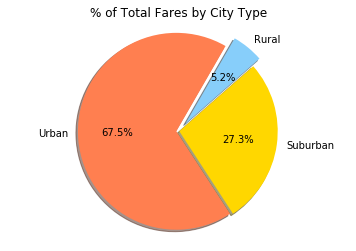

In [152]:
#1.Plotting % of Total Fares by City Type
percentages_fare=[percentage_fare_urban, percentage_fare_suburban, percentage_fare_rural]
explode = [0.03, 0.0, 0.1]
plt.title("% of Total Fares by City Type")
plt.pie(percentages_plot, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)
plt.axis("equal")
plt.savefig("pyber_totalfare_plot.png")
plt.show()

 

In [153]:

total_rides = city_data["total_rides"].sum()

total_rides_urban = urban_data["total_rides"].sum()
percentage_rides_urban = (total_rides_urban / total_rides) * 100

total_rides_suburban = suburban_data["total_rides"].sum()
percentage_rides_suburban = (total_rides_suburban / total_rides) * 100

total_rides_rural = rural_data["total_rides"].sum()
percentage_rides_rural = (total_rides_rural / total_rides) * 100



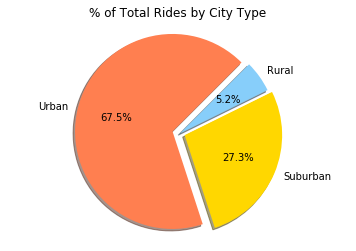

In [154]:

#2.Plotting % of Total Rides by City Type
percentages_rides=[percentage_rides_urban, percentage_rides_suburban, percentage_rides_rural]
explode = [0.08, 0.05, 0]
plt.title("% of Total Rides by City Type")
plt.pie(percentages_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.savefig("pyber_totalrides_plot.png")
plt.show()


In [155]:
total_driver_count = city_data['driver_count'].sum()

total_drivers_urban = urban_data["driver_count"].sum()
total_drivers_suburban = suburban_data["driver_count"].sum()
total_drivers_rural = rural_data["driver_count"].sum()

percentage_drivers_urban= (total_drivers_urban / total_driver_count) * 100
percentage_drivers_suburban= (total_drivers_suburban / total_driver_count) * 100
percentage_drivers_rural= (total_drivers_rural / total_driver_count) * 100

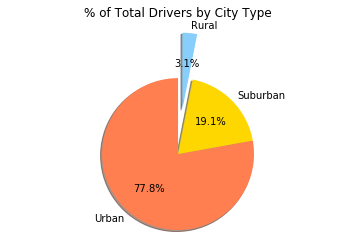

In [156]:
#3.% of Total Drivers by City Type

percentages_drivers=[percentage_drivers_urban, percentage_drivers_suburban, percentage_drivers_rural]
explode = [0.0, 0.0, 0.6]
plt.title("% of Total Drivers by City Type")
plt.pie(percentages_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("pyber_totaldrivers_plot.png")
plt.show()
